In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import keras

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
music_df = pd.read_csv("SpotifyAudioFeaturesNov2018.csv")
sorted_df = music_df.sort_values('popularity',ascending = False)

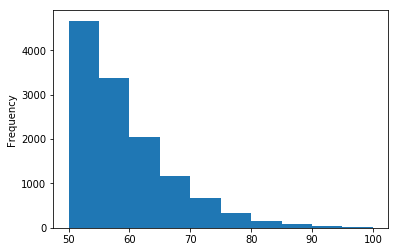

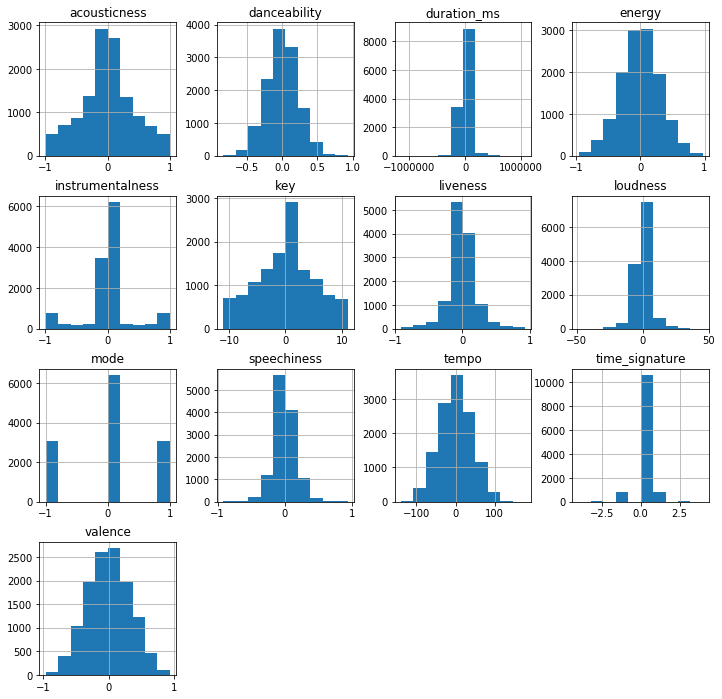

In [7]:
X = music_df[music_df['popularity']].drop(['track_id', 'track_name','popularity','artist_name'],axis = 1)
y = music_df[music_df['popularity']]['popularity']
plt.clf()
y.plot.hist()
X.diff().hist(figsize = (12,12))
plt.show()

In [14]:
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
2,0.0250,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382
50,0.1220,0.552,241160,0.789,0.000005,9,0.0874,-5.449,1,0.0242,93.938,4,0.349
60,0.0271,0.890,200168,0.454,0.000004,8,0.1570,-8.777,1,0.2600,140.041,4,0.425
158,0.7860,0.524,176135,0.307,0.000000,9,0.1110,-9.753,1,0.0465,153.157,4,0.408
170,0.1040,0.532,195920,0.723,0.000009,0,0.1140,-4.691,1,0.0449,125.071,4,0.181


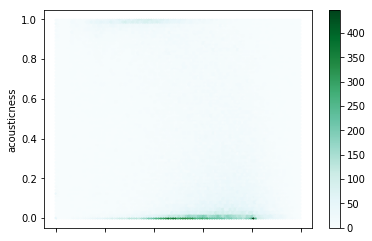

In [13]:
plt.clf()
music_df.plot.hexbin(x= 'danceability',y='acousticness')
plt.show()

In [15]:
y.head()

2      63
50     53
60     65
158    57
170    51
Name: popularity, dtype: int64

In [ ]:
import keras


In [125]:
y.head()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 5, 3), random_state=1)
clf.fit(X,y)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [126]:
df_test = music_df.drop(['track_id', 'track_name','popularity','artist_name'],axis = 1)
clf.predict(df_test)

array([85, 85, 85, ..., 85, 85, 85])

In [113]:
lm = LinearRegression()
lm.fit(X,y)
lm.coef_

array([ 1.79296867e-01,  3.81667597e+00,  1.20801611e-06, -3.09260601e+00,
       -2.68117446e+00,  1.87624385e-03, -2.06872091e-01,  1.62516013e-01,
        1.35254417e-01,  3.92148967e-01,  6.20029695e-03,  3.75299655e-01,
       -3.16519418e-01])

In [116]:
n = lm.predict(music_df.drop(['track_id', 'track_name','popularity','artist_name'],axis = 1))
n

array([60.93340493, 60.32628852, 58.48715402, ..., 58.64573468,
       59.17985957, 58.26346132])

In [115]:
count = 0
for i in n : 
    if i >= 35:
        count+=1
print(count)

116372
